In [5]:
import pandas as pd
df = pd.read_csv("../data/train.csv/train.csv")
df.shape


(9800, 18)

In [6]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
df.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
df.duplicated().sum()


np.int64(0)

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [13]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

df[['Order Date','Year','Month']].head()


,Order Date,Year,Month
0,2017-11-08,2017,11
1,2017-11-08,2017,11
2,2017-06-12,2017,6
3,2016-10-11,2016,10
4,2016-10-11,2016,10


In [14]:
df.to_csv("../data/cleaned_data.csv", index=False)


In [15]:
import pandas as pd

df = pd.read_csv("../data/cleaned_data.csv")

df.shape


(9800, 20)

In [16]:
df.head()
df.describe()


,Row ID,Postal Code,Sales,Year,Month
count,9800.000000,9789.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,55273.322403,230.769059,2016.724184,7.818469
std,2829.160653,32041.223413,626.651875,1.123984,3.281905
min,1.000000,1040.000000,0.444000,2015.000000,1.000000
25%,2450.750000,23223.000000,17.248000,2016.000000,5.000000
50%,4900.500000,58103.000000,54.490000,2017.000000,9.000000
75%,7350.250000,90008.000000,210.605000,2018.000000,11.000000
max,9800.000000,99301.000000,22638.480000,2018.000000,12.000000


In [17]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales.head()


,Year,Month,Sales
0,2015,1,14205.707
1,2015,2,4519.892
2,2015,3,55205.797
3,2015,4,27906.855
4,2015,5,23644.303


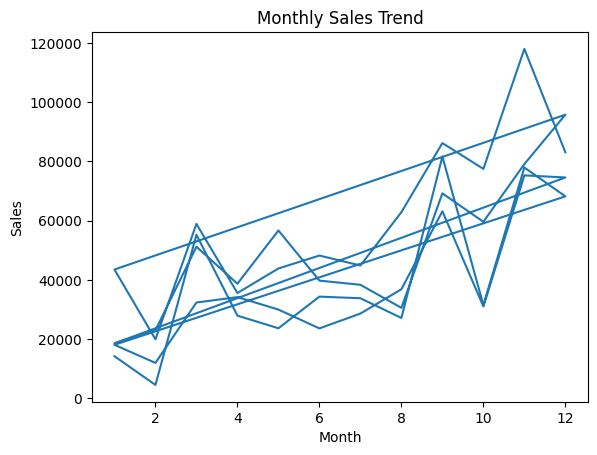

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_sales['Month'], monthly_sales['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.show()


In [19]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales


Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

In [20]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales


Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

In [21]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segment_sales


Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

In [22]:
df.shape


(9800, 20)

In [23]:
df.to_csv("../data/cleaned_sales_data.csv", index=False)


In [25]:
df.to_csv(
    r"D:\mysql_import\cleaned_sales_data_mysql.csv",
    index=False,
    sep='|',
    encoding='utf-8',
    lineterminator='\n'
)


In [4]:
import csv

bad_rows = []

with open(r"D:\mysql_import\cleaned_sales_data_mysql.csv", encoding="utf-8") as f:
    reader = csv.reader(f, delimiter='|')  # pipe-delimited
    header = next(reader)
    expected_cols = len(header)

    for i, row in enumerate(reader, start=2):
        if len(row) != expected_cols:
            bad_rows.append((i, len(row)))

bad_rows[:10]


[]

In [2]:
import os
os.getcwd()


'd:\\Ecommerce Sales Analysis\\python'

In [3]:
import csv

bad_rows = []

with open(r"D:\mysql_import\cleaned_sales_data_mysql.csv", encoding="utf-8") as f:
    reader = csv.reader(f, delimiter='|')  # pipe-delimited
    header = next(reader)
    expected_cols = len(header)

    for i, row in enumerate(reader, start=2):
        if len(row) != expected_cols:
            bad_rows.append((i, len(row)))

bad_rows[:10]


[]